In [9]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

import sklearn
import statsmodels.api as sm
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
%matplotlib inline


In [10]:
house = pd.read_csv('/Users/admin/Pictures/Group1/data/Renthop_rent_house_data.csv',index_col = 0)
house.head()

/Users/admin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,Amenities,No Fee,bathroom,bedroom,description,expert,hopscore,listing_id,median_price,neighborhoods,num_transportation,photo,price,street_address,transportation
0,"['No Fee', 'Swimming Pool', 'Roof Deck', 'Dini...",1,1,1,\nwith spectacular 360 degree views * Elegant ...,0,87.1,9022376,"$2,550","Hell's Kitchen, Midtown Manhattan, Manhattan",20,['https://photos.renthop.com/7/9022376_8caf98e...,"$2,300",W 42 St.,"['7', '1', '2', '3', 'A', 'C', 'E', 'N', 'Q', ..."
1,"['No Fee', 'Laundry In Unit', 'Cats Allowed', ...",1,1,2,\nBeautiful Renovated 2 Bedroom with Lots of C...,Upper East Side Expert,87.1,8859339,"$2,975","Yorkville, Upper East Side, Upper Manhattan, M...",5,['https://photos.renthop.com/7/8859339_6caa061...,"$3,484",E 81st St.,"['N', 'Q', 'T', '6', 'F']"
2,"['No Fee', 'Doorman', 'Elevator', 'Laundry In ...",1,2,2,\nSUPERB Location! Fabulous Top of the line Lu...,Upper East Side Expert,87.1,8765006,"$5,525","Upper East Side, Upper Manhattan, Manhattan",14,['https://photos.renthop.com/7/8765006_e1b9b25...,"$6,500",201 East 69 Street,"['6', 'N', 'Q', 'T', 'F', '4', '5', '6', 'N', ..."
3,"['No Fee', 'Floorplans Available', 'Doorman', ...",1,1,1,\nBRAND NEW LUXURY BUILDING - DOWNTOWN BROOKLY...,0,87.1,8817639,"$2,525","Fort Greene, Northwestern Brooklyn, Brooklyn",18,['https://photos.renthop.com/7/8817639_d5e90ac...,"$2,441",Ashland Place,"['2', '3', '4', '5', 'N', 'Q', 'R', 'B', 'D', ..."
4,"['No Fee', 'Doorman', 'Elevator', 'Fitness Cen...",1,1,1,\nFor Quickest Access and a Custom Tailored Pr...,0,87.1,8751507,"$2,600","Financial District, Downtown Manhattan, Manhattan",15,['https://photos.renthop.com/7/8751507_7c3356b...,"$2,850",Pine Street,"['2', '3', 'J', 'Z', '2', '3', 'A', 'C', '4', ..."


# data processing for modeling

In [11]:
for col_name in ['price','median_price']:#, 'median_price'
    house[col_name] = house[col_name].str.replace('$', '')
    house[col_name] = house[col_name].str.replace(',', '')
    house[col_name] = house[col_name].astype(float)

In [12]:
house = house[house.bedroom != '*']
house = house[house.bedroom != ' ']
house['bedroom'] = house['bedroom'].astype(float)

house['bathroom'] = house['bathroom'].astype(float)

In [13]:
# import numpy as np
# #log transfrom the target
# house["logprice"] = np.log1p(house['price'])

In [14]:
# house['logprice']

In [15]:
# from scipy.stats import skew
# # log transform skewed numeric features
# numeric_features = house.dtypes[house.dtypes != 'object'].index

# skewed_features = house[numeric_features].apply(lambda x: skew(x.dropna())) #datafram.dropna()
# skewed_features = skewed_features[skewed_features> 0.75]
# skewed_features = skewed_features.index

# house[skewed_features] = np.log1p(house[skewed_features])

In [16]:
closest_neighborhoods =[]
neighborhooh_range = house['neighborhoods'].tolist()

for i in range(len(neighborhooh_range)):
    try:
        closest_neighborhoods.append(neighborhooh_range[i].split(',')[0])
    except:   
        closest_neighborhoods.append('NA')
    
house['closest_neighborhoods'] = closest_neighborhoods

In [17]:
#Get Dummies for the Neighborhoods
house_with_dummies= pd.get_dummies(house, prefix='Neighborhoods_', columns=['closest_neighborhoods'])

In [18]:
house_with_dummies['price']

0        2300.0
1        3484.0
2        6500.0
3        2441.0
4        2850.0
5        2749.0
6        2500.0
7        3474.0
8        2050.0
9        4385.0
10       3500.0
11       2890.0
12       2650.0
13       1800.0
14       3200.0
15       3550.0
16       2550.0
17       2700.0
18       7000.0
19       2500.0
20       2550.0
21       2800.0
22       2750.0
23       4758.0
24       4695.0
25       3900.0
26       2400.0
27       3500.0
28       3725.0
29       4300.0
          ...  
74352    4445.0
74353    3200.0
74354    3495.0
74355    3575.0
74356    2950.0
74357    3795.0
74358    1795.0
74359    2900.0
74360    3500.0
74361    2650.0
74362    3700.0
74363    3970.0
74364    2400.0
74365    6137.0
74366    5450.0
74367    4950.0
74368    2475.0
74369    3590.0
74370    2325.0
74371    3853.0
74372    3872.0
74373    5495.0
74374    2929.0
74375    3625.0
74376    3650.0
74377    2495.0
74378    5295.0
74379    3819.0
74380    2695.0
74381    4107.0
Name: price, dtype: floa

In [19]:
house_with_dummies.drop('Amenities', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('description', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('expert', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('neighborhoods', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('listing_id', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('photo', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('street_address', axis = 1, inplace = True, errors = 'ignore')
house_with_dummies.drop('transportation', axis = 1, inplace = True, errors = 'ignore')

In [20]:
house_with_dummies.head()

,No Fee,bathroom,bedroom,hopscore,median_price,num_transportation,price,Neighborhoods__Albemarle and Kenmore Terraces,Neighborhoods__Alphabet City,Neighborhoods__Amagansett,...,Neighborhoods__West Orange,Neighborhoods__West Side,Neighborhoods__West Town,Neighborhoods__West Village,Neighborhoods__Williamsburg,Neighborhoods__Windsor Terrace,Neighborhoods__Wingate,Neighborhoods__Woodhaven,Neighborhoods__Woodside,Neighborhoods__Yorkville
0,1,1.0,1.0,87.1,2550.0,20,2300.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2.0,87.1,2975.0,5,3484.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2.0,2.0,87.1,5525.0,14,6500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,1.0,87.1,2525.0,18,2441.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1.0,87.1,2600.0,15,2850.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#filling Na's with the mean of the column
house_with_dummies = house_with_dummies.fillna(house_with_dummies.mean())
y = house_with_dummies['price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(house_with_dummies, y,test_size=0.2,random_state=42)

In [23]:
X_train = X_train.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)
X_test = X_test.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)

# modeling

In [24]:
#Random Forest
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold


# model metric

# RMSPE

In [25]:
from sklearn.metrics import mean_squared_error
import math
def RMSPE(y, y_pred):
    return math.sqrt( ((1- y_pred / y)**2).mean() )
kf = KFold(n_splits=10, random_state = 123)

# Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scores_lr = []
for train_idx, test_idx in kf.split(X_train.values):
    X_train_val, y_train_val = X_train.values[train_idx], y_train.values[train_idx]
    X_test_val, y_test_val = X_train.values[test_idx], y_train.values[test_idx]
    score =RMSPE(y_test_val , lr.fit(X_train_val, y_train_val).predict(X_test_val))
    scores_lr.append(score)

In [19]:
scores_lr

[1.7461678418031652e-08,
 3.9639339140335394e-08,
 1.0163862710249519e-08,
 4.640113063162045e-08,
 5.683163508017631e-09,
 7.018430348470542e-09,
 3.1572039711073503e-09,
 2.1275906905541326e-08,
 2.274381564507671e-09,
 2.8855447206506616e-08]

## Bagging

In [35]:
bagging = BaggingRegressor(n_estimators=100, max_samples=1.0, max_features=0.4)

In [36]:
scores_bagging = []
kf = KFold(n_splits=10, random_state = 123)
for train, val in kf.split(X_train):
    y_pred = bagging.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
    score = RMSPE(y_train.values[val], y_pred)
    scores_bagging.append(score)

In [37]:
scores_bagging

[0.1277268443009138,
 0.13947990193964363,
 0.14157442327621714,
 0.14606485600629268,
 0.15231767809591987,
 0.13340250190681016,
 0.15228702324286142,
 0.14577111917408386,
 0.1297817287755317,
 0.1477061954290511]

In [76]:
y_pred_bagging = bagging.fit(X_train,y_train).predict(X_test)


In [77]:
RMSPE(y_test, y_pred_bagging)

0.13896194068956422

# RMSE

In [78]:
from sklearn.metrics import mean_squared_error
# Bagging
mean_squared_error(y_test, y_pred_bagging)

513142.82676140062

In [81]:
RMSE_bagging = math.sqrt(mean_squared_error(y_test, y_pred_bagging)) 
RMSE_bagging

716.3398821519019

## RandomForestRegressor

In [39]:
scores_rfr = []

clf = RandomForestRegressor(n_estimators=50, n_jobs=-1)
for train, val in kf.split(X_train):
    y_pred = clf.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
    score = RMSPE(y_train.values[val], y_pred)
    scores_rfr.append(score)

In [40]:
scores_rfr

[0.0005335710423515703,
 0.0003628691306796499,
 0.0013412767599280762,
 0.000623301872237829,
 0.0010583269537309207,
 0.000528191050146306,
 0.0007489124858703985,
 0.0005091152106342747,
 0.0024093770140874663,
 0.0005009612936475674]

In [79]:
y_pred_clf = clf.fit(X_train,y_train).predict(X_test)


In [82]:
RMSPE(y_test, y_pred_clf)

0.0006436375614861437

# RMSE

In [83]:
mean_squared_error(y_test, y_pred_clf)

102.15833068388137

In [86]:
RMSE_clf = math.sqrt(mean_squared_error(y_test, y_pred_clf)) 
RMSE_clf

10.10734043573686

## AdaBoostRegressor

In [26]:
abr = AdaBoostRegressor(n_estimators=200, learning_rate=0.05, loss='linear')

In [27]:
scores_abr = []
for train, val in kf.split(X_train):
    y_pred = abr.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
    score = RMSPE(y_train.values[val], y_pred)
    scores_abr.append(score)

In [28]:
scores_abr

[0.17895326358496402,
 0.17941412285013056,
 0.17711303721986568,
 0.17622319690473906,
 0.17873177983058294,
 0.18402425671365913,
 0.17999405085525444,
 0.18379381286815602,
 0.1723483361196048,
 0.17946095202663803]

In [87]:
y_pred_abr = abr.fit(X_train,y_train).predict(X_test)


In [88]:
RMSPE(y_test, y_pred_abr)

0.1797036746805002

# RMSE

In [90]:
RMSE_abr = math.sqrt(mean_squared_error(y_test, y_pred_abr)) 
RMSE_abr

453.36910994009463

## XGBoost

In [29]:
est=xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.045, learning_rate=0.1, max_depth=20,
                     min_child_weight=1.5, n_estimators=100,  
                     reg_alpha=0.65, reg_lambda=0.45, subsample=0.8)

In [30]:
scores_xgb = []
for train, val in kf.split(X_train):
    y_pred = est.fit(X_train.values[train],y_train.values[train]).predict(X_train.values[val])
    score = RMSPE(y_train.values[val], y_pred)
    scores_xgb.append(score)

In [31]:
scores_xgb

[0.04888159248196277,
 0.05148439296235607,
 0.056613174204005585,
 0.05877355559358461,
 0.052883456532074,
 0.027985268964812623,
 0.026307564118353763,
 0.039356813559215977,
 0.027523143147634602,
 0.031940571357153336]

In [95]:
y_pred_est = est.fit(X_train,y_train).predict(X_test)


In [96]:
RMSPE(y_test, y_pred_est)

0.005455852563364049

# RMSE

In [97]:
RMSE_est = math.sqrt(mean_squared_error(y_test, y_pred_est)) 
RMSE_est

25.51310903717584

## Plot Model performance over each iteration

In [41]:
scores_summary = pd.DataFrame({'Bagging':scores_bagging,'AdaBoost':scores_abr,
                              'RandomForest':scores_rfr, 'GrandientBoost':scores_xgb})

In [43]:
# scores_summary['BaseLine'] = scores_bl
# scores_summary

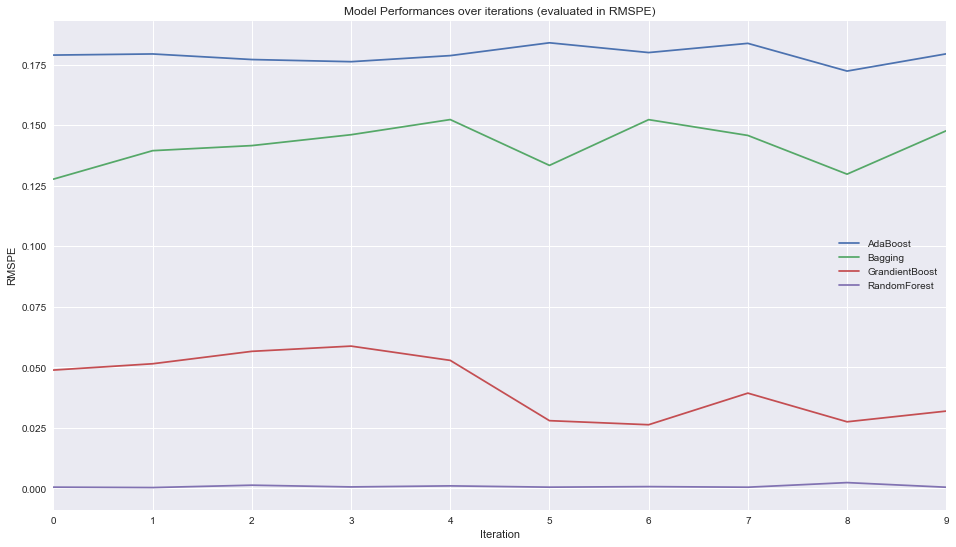

In [45]:
scores_summary.plot(figsize = (16,9))
plt.xlabel('Iteration')
plt.ylabel('RMSPE')
plt.title('Model Performances over iterations (evaluated in RMSPE)')
plt.savefig('/Users/admin/Desktop/ModelPerformanceoverIterations.png')

In [48]:
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 10, "seed": 42, "silent": 1,
             'colsample_bytree':0.9, 'gamma':0.3,  'min_child_weight':4,
                     'reg_alpha':0.65, 'reg_lambda':5, 'subsample':0.9}
num_rounds = 1000

dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

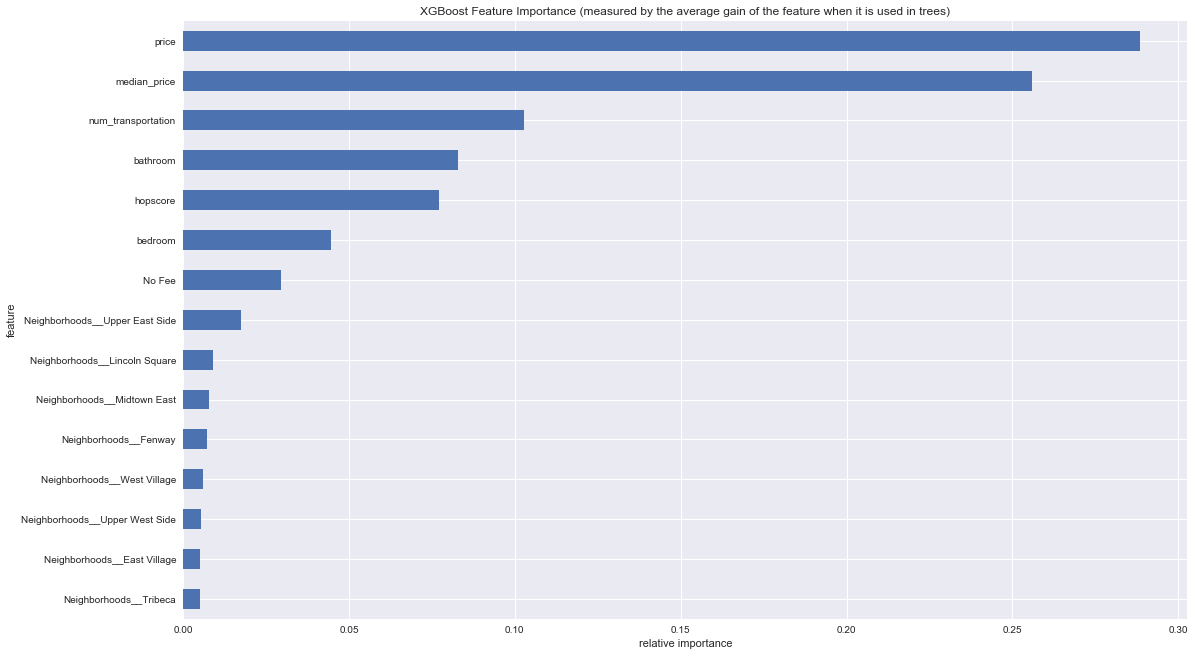

In [50]:
importance = gbdt.get_score(importance_type='weight')
importance = sorted(importance.items(), key = lambda x:x[1], reverse = True)
df = pd.DataFrame(importance, columns=['feature', 'fscore']).sort_values(by = 'fscore')
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df[-15:].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(18, 11))
plt.title('XGBoost Feature Importance (measured by the average gain of the feature when it is used in trees)')
plt.xlabel('relative importance')
plt.savefig('/Users/admin/Desktop/BIA652_FeatureImportance_weight.png')